In [2]:
import pandas as pd
# data from kaggle
df = pd.read_csv('./data/NY Realstate Pricing.csv')
# select Manhattan
dat = df[df['neighbourhood'].isin(['Battery Park City', 'Central Harlem', 'Chelsea', 'Chinatown', 'Civic Center', 'East Harlem', 'East Village', 'Financial District', 'Flatiron', 'Gramercy', 'Greenwich Village', 'Harlem', 'Hell\s Kitchen', 'Inwood', 'Kips Bay', 'Lenox Hill', 'Lincoln Square', 'Little Italy', 'Lower East Side', 'Manhattan Valley', 'Manhattanville', 'Marble Hill', 'Meatpacking District', 'Midtown', 'Morningside Heights', 'Murray Hill', 'NoHo', 'Nolita', 'Roosevelt Island', 'SoHo', 'Stuyvesant Town', 'Theater District', 'TriBeCa', 'Two Bridges', 'Upper East Side', 'Upper West Side', 'Washington Heights', 'West Village', 'Yorkville'])]

In [64]:
# remove shared rooms
dat = dat[dat['room_type'] != 'Shared room']

In [65]:
dat = dat.drop(['F1', 'id', 'latitude', 'longitude', 'availability_2020', 'reviews_per_month'], axis=1)

In [3]:
# remove not reviewd and over $500 properties
dat = dat[ dat['number_of_reviews'] > 7]
dat = dat[dat['price']<500]
dat.describe()

,F1,id,latitude,longitude,price,days_occupied_in_2019,minimum_nights,number_of_reviews,reviews_per_month,availability_2020
count,2245.000000,2.245000e+03,2245.000000,2245.000000,2245.000000,2245.000000,2245.00000,2245.000000,2245.000000,2245.000000
mean,16570.814254,1.398283e+07,40.772371,-73.969413,149.750557,192.921604,6.70245,70.447216,1.892347,138.606682
std,10953.490566,9.595473e+06,0.039378,0.022718,81.844126,127.483899,29.64190,69.272490,1.570303,132.666536
min,0.000000,2.595000e+03,40.703950,-74.017560,10.000000,0.000000,1.00000,8.000000,0.100000,0.000000
25%,6174.000000,4.766618e+06,40.735610,-73.989180,90.000000,58.000000,2.00000,21.000000,0.650000,4.000000
50%,16490.000000,1.384693e+07,40.770580,-73.971730,129.000000,208.000000,3.00000,48.000000,1.440000,91.000000
75%,26451.000000,2.211433e+07,40.803000,-73.948740,195.000000,313.000000,4.00000,94.000000,2.710000,277.000000
max,35571.000000,3.055336e+07,40.876650,-73.908550,499.000000,364.000000,1125.00000,623.000000,9.120000,365.000000


Text(0.5, 1.0, 'Properties distribution by price')

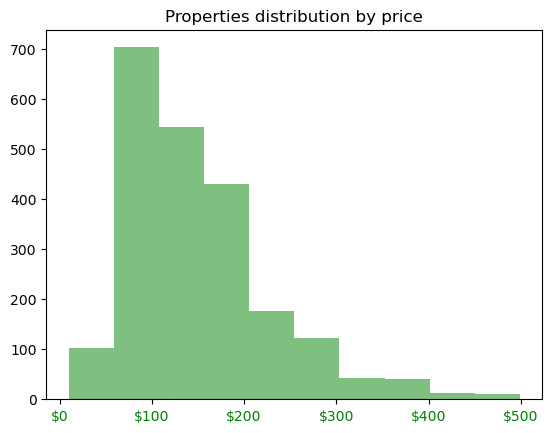

In [69]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plt.hist(dat['price'], 
         bins = 10, 
         alpha = 0.5, 
         histtype ='stepfilled', 
         color = 'green')
ax.xaxis.set_major_formatter('${x:,.0f}')
ax.xaxis.set_tick_params(which='major', labelcolor='green')

plt.title('Properties distribution by price')

In [71]:
dat.groupby(['room_type'])['price'].agg(['median', 'count']).sort_values(by=['median'], ascending = False)

,median,count
room_type,,
Hotel room,198.5,14
Entire home/apt,179.0,1237
Private room,90.0,931


<Axes: xlabel='neighbourhood'>

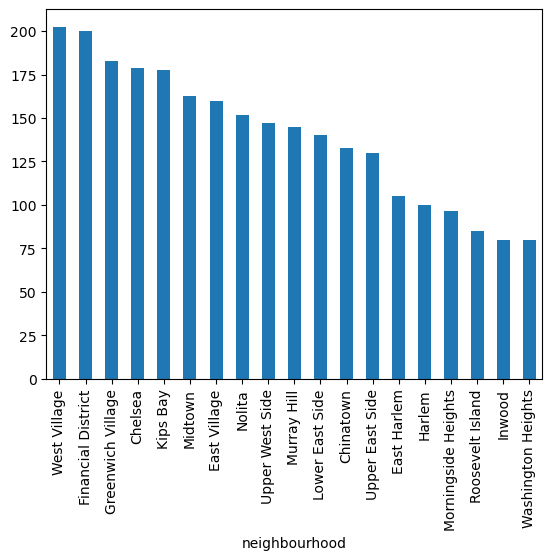

In [60]:
hoods_med_price = dat.groupby(['neighbourhood'])['price'].agg(['median', 'count'])
hoods_med_price = hoods_med_price[hoods_med_price['count']>9].sort_values(by=['median'], ascending = False)
hoods_med_price['median'].plot(kind='bar')